<a href="https://colab.research.google.com/github/Neeraj3008/Synapse_tasks/blob/main/Copy_of_Synapse_LP_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
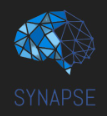

Congratulations on making it this far!! Welcome to the world of classification where we move on from unsupervised to helping the algorithms by telling them exactly what the data we're feeding them is. This week we'll be looking into  many algorithms such as Decision Trees, SVC, Naive Bayes, Random Forest and so on. We'll also be delving into hyperparameter tuning the only place where ched chaad can lead to a good result.

**Warning: This task contains many theory questions. Proceed with caution!**

Jk, make sure you research well and make sure you are understanding the models y'all are implementing as that will make your concepts much stronger and build a strong ML foundation which will be very useful as we move further with the tasks.

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

## Importing the dataset

Use this link to download the adult income dataset and upload it to your drive.

https://drive.google.com/file/d/1VAE1qF16D-sKnBOWXzGXVNGhtNZNLFQS/view?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Mounted at /content/drive


In [2]:
#import your dataset here
import pandas as pd
import numpy as np

data = pd.read_csv('/content/adult_income_dataset.csv')
data.head()


age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Dealing with Nan values

In [4]:
print(data.isnull().sum())


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [7]:

data['workclass'].fillna('Unknown', inplace=True)
data['occupation'].fillna('Unknown', inplace=True)
data['native-country'] = data['native-country'].fillna(data['native-country'].mode()[0])


In [8]:
print(data.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


## Object Valued Columns

For Relationship, Race and Sex find out the max division average fnlwgt for each unique value.

In [9]:
#Write your code here
data.select_dtypes(include='object').columns



Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [12]:
rel_avg = data.groupby('relationship')['fnlwgt'].mean()
rel_avg.max()

205059.82161060142

In [13]:
race_avg = data.groupby('race')['fnlwgt'].mean()
race_avg.max()

228013.1241997439

In [14]:
sex_avg = data.groupby('sex')['fnlwgt'].mean()
sex_avg.max()

191771.44901330885

In [17]:
#write your code here
data.drop('education-num', axis=1, inplace=True)


KeyError: "['education-num'] not found in axis"

In [18]:
data.head()

age         workclass  fnlwgt  education      marital-status  \
0   39         State-gov   77516  Bachelors       Never-married   
1   50  Self-emp-not-inc   83311  Bachelors  Married-civ-spouse   
2   38           Private  215646    HS-grad            Divorced   
3   53           Private  234721       11th  Married-civ-spouse   
4   28           Private  338409  Bachelors  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country income  
0             0              40  United-States  <=50K  
1             0              13  United-States  <=50K  
2             0              40  United-States  <=50K  
3             0              40  United-States  <=50K  
4             0              40           Cuba  <=50K

## Getting rid of unnecessary columns

*   Drop the education num column since we already have their education in the form of categories
*   Check the combinations of the marital-status and relationship column, see if we need both of them or just marital status will work too.


In [19]:
print(data['marital-status'].unique())
print(data['relationship'].unique())


['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


In [20]:
pd.crosstab(data['marital-status'], data['relationship'])


relationship           Husband  Not-in-family  Other-relative  Own-child  \
marital-status                                                             
Divorced                     0           2404             110        328   
Married-AF-spouse            9              0               1          1   
Married-civ-spouse       13184             17             124         95   
Married-spouse-absent        0            211              32         45   
Never-married                0           4706             611       4485   
Separated                    0            420              55         99   
Widowed                      0            547              48         15   

relationship           Unmarried  Wife  
marital-status                          
Divorced                    1601     0  
Married-AF-spouse              0    12  
Married-civ-spouse             0  1556  
Married-spouse-absent        130     0  
Never-married                881     0  
Separated                    451     0  
Widowed                      383     0

marital status tells us that if a person divorced , never married , widowed

relationship tells us about a if a person is husband ,wife,with children


these two are closely related as married will always be in husband or wife also never married will always be either not in family or own a child

## Dealing with Categorical Data
As you probably know by now, the ML models dont know how to deal with String or object type data... so your mission shall you choose to accept it (don't really have much of a choice) is to find out which columns to do one hot encoding on and which columns to do Label Encoding on.

**Hint: Since Marital-status has less number of columns (distinct values na), One Hot encode it**

In [ ]:
#Write your code here
#Hint: Check which needs one hot encoding which needs label encoding
#Then perform necessary transformations (Feel free to add more coding cells)

## Altering the Target Column
Modify the Target Column (income) to make sure that all the values which are <=50K are replaced with a 0 and the values >50K are replaced with a 1.

In [ ]:
#write your code here


**Extract the target column(income) and store it in a seperate variable and remove it from the original dataset. Additionally, do a 70:30 Train Test Split**

In [ ]:
#write your code here


### Chalo now that we have the preprocessed data we can feed it into the models. Lets start with some basic ones.

# Logistic Regression
*   Theory:https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe
*   Implementation: https://www.youtube.com/watch?v=n40hS9tQmcY


Explain the algorithm, its working and its use cases.

In [ ]:
#import the model and apply it to the data


Find the accuracy and confusion matrix for the same and explain what it shows.

### Now that you have printed a confusion matrix and classification report. Let's see what you have understood from it. Write a short paragraph highlighting what you understoood from it below.

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [ ]:
#import the model from sklearn and apply it to your data


# Make predictions


# Calculate accuracy


# Decision Tree Classifier
* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

In [ ]:
#import the decision tree from sklearn and run it on your data


<b>Print the Model Accuracy</b>

## Explain: What are the differences in the working of Logistic Regression, Naive Bayes and Decision Tree and explain why are the accuracies are different.

Ans:

### Mention some real life use cases for each of these three models:

Ans:

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [ ]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)


In [ ]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz #(ur model name, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [ ]:
#write code here


### Explain the different hyperparameters you changed and how did it affect the models. Also give a summary of the graphs you made.

Ans:

## SUPPORT VECTOR MACHINE (SVM)

Theory : https://www.youtube.com/watch?v=efR1C6CvhmE (Part 1)

Theory: https://www.youtube.com/watch?v=H9yACitf-KM

Maths Intuition : https://www.youtube.com/watch?v=Js3GLb1xPhc

EXTRAS:

https://www.youtube.com/watch?v=NDqACjz5j8g

If you are more curious and want to explore :

https://www.youtube.com/watch?v=Toet3EiSFcM (Part 2)

https://www.youtube.com/watch?v=efR1C6CvhmE&t=432s (Part 3)

https://www.youtube.com/watch?v=8bFKyb77vp0




In [ ]:
#Now that we know SVM is sensitive to feature scales, so standardize (don't forget to standardise your X_test):


In [ ]:
#Train your model


In [ ]:
#Predict and check accuracies


In [ ]:
#let's try out using different kernels now. Freedom to choose lies in your hands. EXPLOREEE!


## BIAS AND VARIANCE
### Hurrayy! You have made it so far sane.

### Before moving forward let's first understand what exactly do you mean by bias and variance.

THEORY: https://www.geeksforgeeks.org/machine-learning/bias-vs-variance-in-machine-learning/ (explained in quite detail do read this not just video)

VIDEO: https://www.youtube.com/watch?v=EuBBz3bI-aA


## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [ ]:
#implement Random forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier


# Train the model


# Make predictions on the test data

# Evaluate the model's performance


# Optional: Generate a classification report for more details


In [ ]:
#find the accuracy


### Explain the difference between random forest and decision tree. Also think of cases where the outputs for both of them can be same if its possible.

Ans :

In [ ]:
#write a code to implement BaggingClassifier


# Initialize the base estimator (e.g., Decision Tree)

# Initialize the BaggingClassifier


# Train the Bagging model

# Make predictions on the test data

# Evaluate the model's performance


# Optional: Generate a classification report for more details


### Explain how are Bagging and Random Forest different and why do we do bagging?


Ans :

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
*   Theory:https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [ ]:
#write code here

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

#yk the drill now


Just to make things more interesting implement XGBoost as well and compare its accuracy with that of AdaBoost :)

In [ ]:
!pip install xgboost
import xgboost as xgb


### Explain: What is the difference between Adaboost and XGBoost. Also describe in what cases is XGBoost better to use than AdaBoost.

Ans :

## Explain: What is the difference between Bagging and Boosting? Explain with examples

Ans:








### 3. Pruning Techniques



*   Theory: https://opendatascience.com/what-is-pruning-in-machine-learning/
*   Theory:https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107



In [ ]:
#implement pruning


In [ ]:
#before plotting a tree you will need to first convert your X_train and X_test to DataFrame (Explain WHY (Hint: You made one tree before and it worked fine so it has to do with something you did after..Explore))
#Code to convert it here:




In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique


<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

As a brush up on data visualisation... make a graph to compare the accuracies you achieved for each of the models you trained and explain which one is the best to perform classification tasks and why?

In [ ]:
#write your code here


# **RESEARCH TASK**

Ensemble Models are not only used for classification but also for Regression.Research on the various regression models such as XGBoost Regressor and Random Forest regressor and how are they different from the Linear Regression model we made in Task 2. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2025 - 2026